In [18]:
#ipython fucntions for displaying the images
from IPython.display import Image
from IPython.core.display import HTML

# Linear regression

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. 
                                                                                                         
                                                                                                     -Wikipedia

Three major uses for regression analysis are <br>** (1) causal analysis** <br>** (2) forecasting an effect** <br>** (3) trend forecasting.**<br>

Other than correlation analysis, which focuses on the strength of the relationship between two or more variables, regression analysis assumes a dependence or causal relationship between one or more independent variables and one dependent variable.

Firstly, the regression might be used to identify the strength of the effect that the independent variable(s) have on a dependent variable.  Typical questions are what is the strength of relationship between dose and effect, sales and marketing spend, age and income.

Secondly, it can be used to forecast effects or impact of changes.  That is, the regression analysis helps us to understand how much the dependent variable change with a change in one or more independent variables.  Typical questions are, "how much additional Y do I get for one additional unit X?"

Thirdly, regression analysis predicts trends and future values.  The regression analysis can be used to get point estimates.  Typical questions are, "what will the price for gold be in 6 month from now?"  "What is the total effort for a task X?"
                                                                                                    

![alt text](SbqXz.png "imp_gif")

![alt text](plane.jpg "imp_gif")

![alt text](weight_height_regression.png "imp_gif")

# Theory


[**Example model of an Exponential Function**](https://www.desmos.com/calculator/h2e5upl4br)
<br>
[**Linear Transformation**](http://stattrek.com/regression/linear-transformation.aspx?Tutorial=AP)
<br>
[**Linear Regression Theory: Andrew Mg**](http://cs229.stanford.edu/notes/cs229-notes1.pdf)
<br>


![alt text](https://media.giphy.com/media/gtJKKa3I3yJsA/giphy.gif "imp_gif")


In [19]:

%matplotlib inline
import numpy as np,matplotlib.pyplot as plt,pandas as pd

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


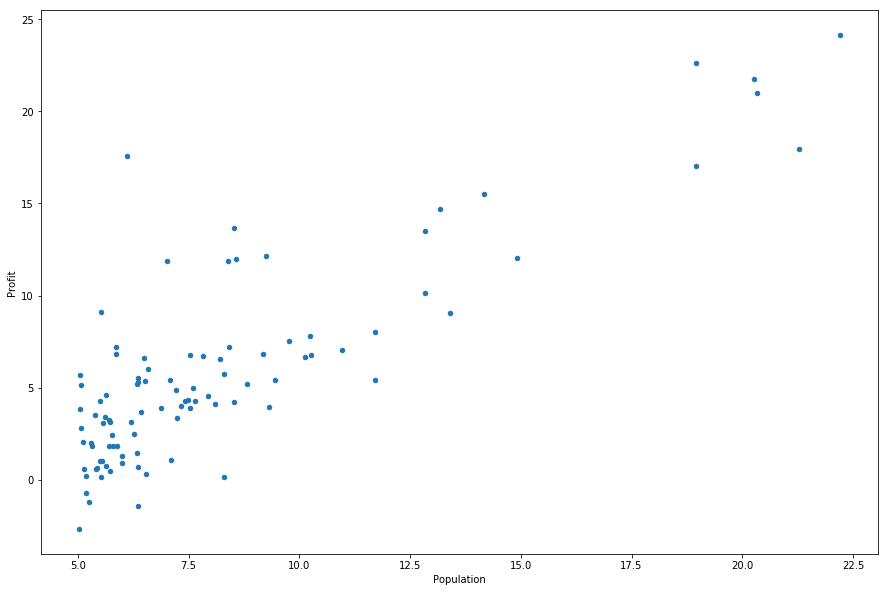

In [20]:
#loading and processing data
data = pd.read_csv('1.txt', header=None, names=['Population', 'Profit'])
print(data.head())
print(data.describe())

data.plot(kind='Scatter',x='Population',y='Profit',figsize=(15,10))

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


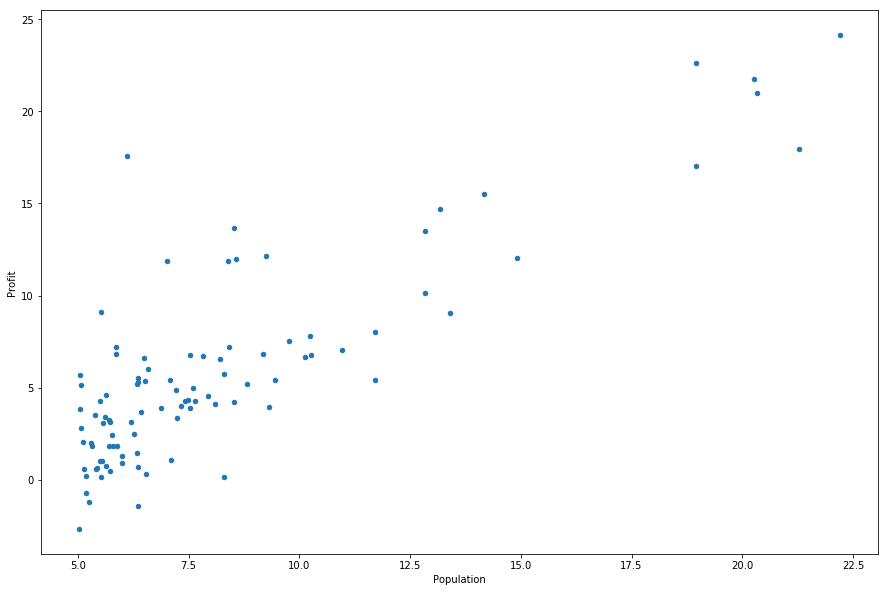

In [21]:
#loading and processing data
data = pd.read_csv('1.txt', header=None, names=['Population', 'Profit'])
print(data.head())
data.plot(kind='Scatter',x='Population',y='Profit',figsize=(15,10))

![alt text](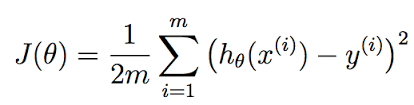 "Hierarchical Clustering")



In [22]:
#cost function
def computeCost(X,y,theta):
    inner=np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(len(X)*2)

In [23]:
data.insert(0,'ones',1) #insert ones a coloumn of values '1' so as to make computations easy
cols = data.shape[1]
X=data.iloc[:,0:cols-1]
Y=data.iloc[:,cols-1:cols]
print(X.head())


   ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598


In [24]:
print(Y.head())

    Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233


In [25]:
X=np.matrix(X.values)
Y=np.matrix(Y.values)
theta=np.matrix(np.array([0,0]))
print(X.shape, theta.shape, Y.shape)

((97, 2), (1, 2), (97, 1))


In [26]:
computeCost(X, Y, theta)

32.072733877455676

![alt text](https://i.stack.imgur.com/O752N.png "algo")

In [27]:
def gradientDescent(X, y, theta, alpha, iters):
    cost_history=[0]*iters
    m=len(y)
    for iteration in range(iters):
        hypothesis=X.dot(theta.T)
        loss=hypothesis-y
        grad=(loss.T).dot(X)/m
        theta=theta-alpha*grad
        cost_history[iteration]=computeCost(X,y,theta)
    return theta,cost_history

(matrix([[ nan,  nan]]), nan)


/Users/Vinit/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Vinit/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


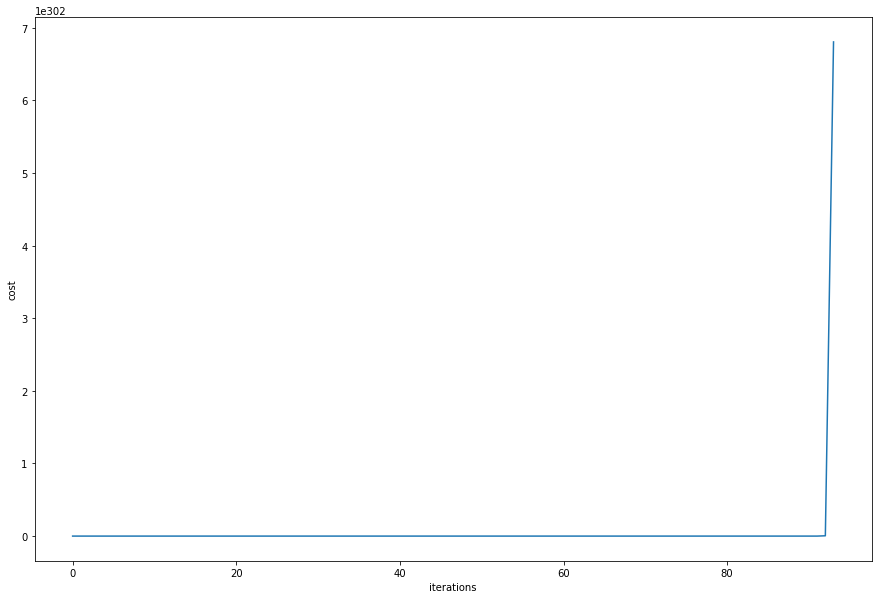

In [28]:
alpha = 0.5
iters = 1000
g, cost = gradientDescent(X, Y, theta, alpha, iters)
plt.figure(figsize=(15,10))
plt.xlabel('iterations')
plt.ylabel('cost')
plt.plot(cost)
print(g,computeCost(X, Y, g))


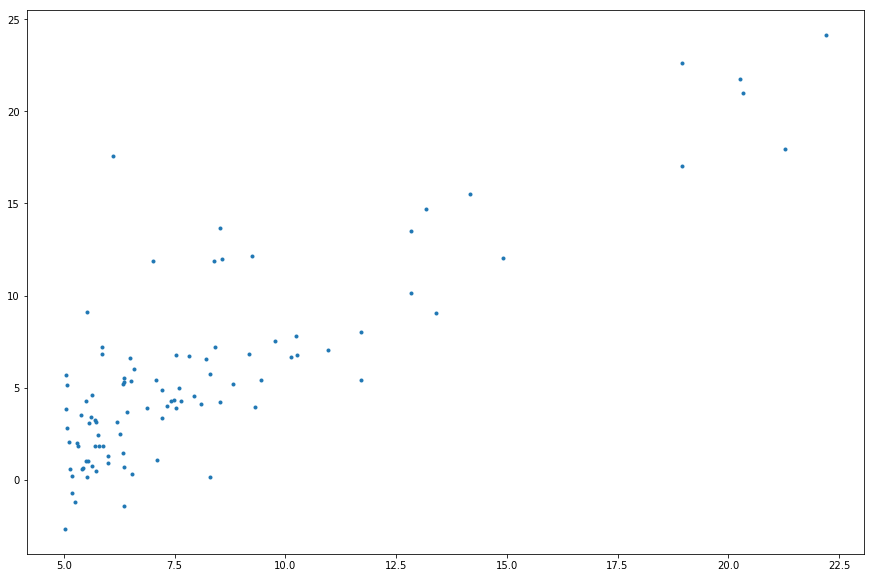

In [29]:
x = np.linspace(data.Population.min(), data.Population.max(), 100) #predict values

f = g.item(0) + (g.item(1) * x)
plt.figure(figsize=(15,10))
plt.scatter(x=data.Population,y=data.Profit,marker='.')
plt.plot(x,f)


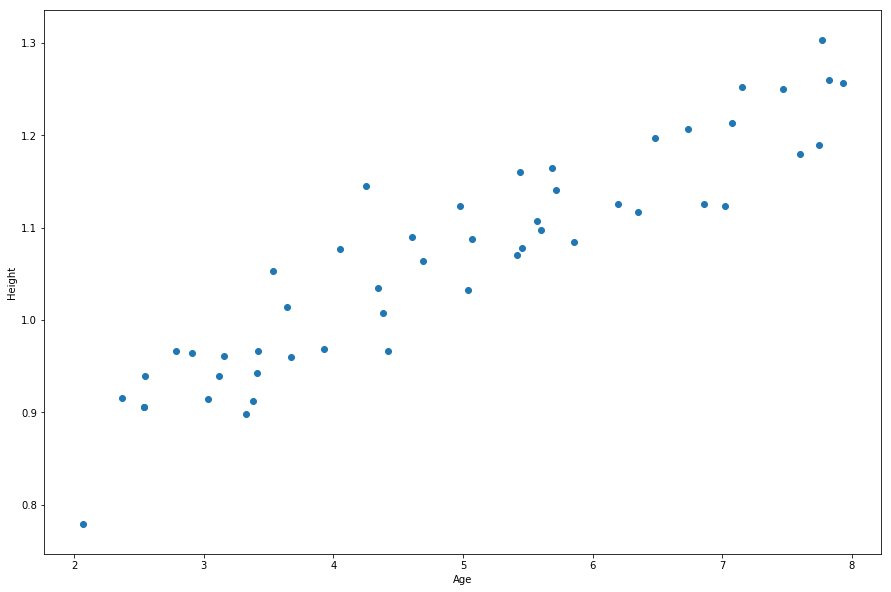

In [30]:
from sklearn import linear_model
import pandas, numpy as np
#loading files
x=pandas.read_csv('ex2x.dat',header=None)
x=list(x[0])
y=pandas.read_csv('ex2y.dat',header=None)
y=list(y[0])
#plotting
plt.figure(figsize=(15,10))
plt.scatter(x=x,y=y)
plt.xlabel("Age")
plt.ylabel("Height")

In [31]:
regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1), np.array(y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

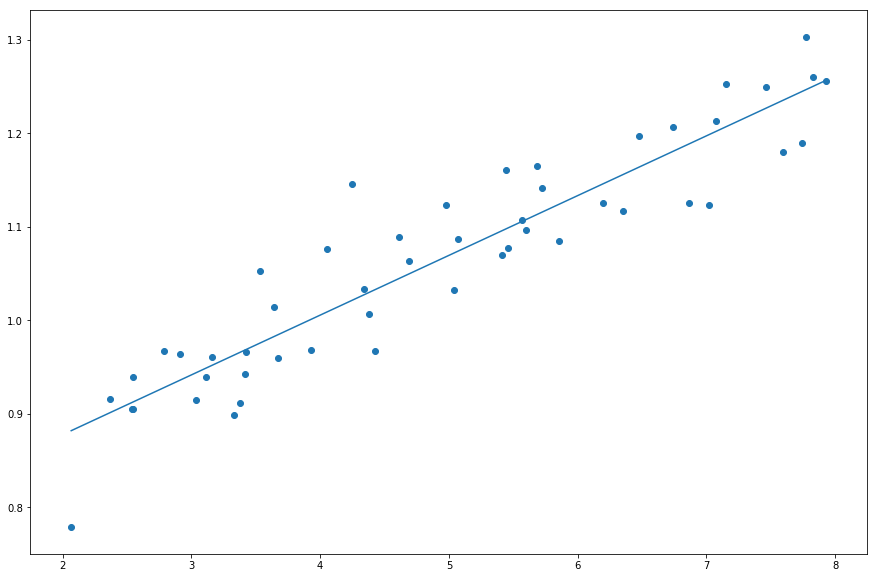

In [32]:
lp = np.linspace(min(x),max(x),100) #predict values
m = regr.coef_[0]
b = regr.intercept_
lnp=[]
for val in lp:
    lnp.append(b+m*val)
plt.figure(figsize=(15,10))    
plt.plot(lp,np.array(lnp))
plt.scatter(x,y)

![alt text](https://media.giphy.com/media/l1J9BYtKky9saXux2/giphy.gif "algo")
<br>
<br>
<br>
<br>
<br>
<br>
<br>
[**Boston Dataset**](http://www.ritchieng.com/machine-learning-project-boston-home-prices/)

In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.<br>
The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:<br>
16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.<br>
1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.<br>
The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.
Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
![alt text](https://media.giphy.com/media/l0MYB17ZzaTTpl8S4/giphy.gif "done")